In [1]:
%cd /data1/yokoyama/labvideo
import os
import sys
import shutil
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml

sys.path.append(".")
from src.utils import json_handler, video

/data1/yokoyama/labvideo


In [2]:
paint_video_paths = sorted(glob("annotation/video/*.mp4"))
paint_imgs_dir = "annotation/yolov8_finetuning/frames"
os.makedirs(paint_imgs_dir, exist_ok=True)

In [3]:
# extract annotated images
# for video_path in tqdm(paint_video_paths):
#     cap = video.Capture(video_path)
#     if not cap.is_opened:
#         print(f"skip {video_path}")
#         continue
#     ret, frame = cap.read()
#     # print(video_path)
#     # plt.imshow(frame)
#     # plt.show()

#     img_path = os.path.join(paint_imgs_dir, os.path.basename(video_path).replace("mp4", "jpg"))
#     cv2.imwrite(img_path, frame)
#     del cap

In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO("models/yolo/yolov8n.pt")
model.train(data="datasets/yolov8_finetuning/yolov8_finetuning.yaml", epochs=0)

New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.10 🚀 Python-3.10.14 torch-2.1.2+cu118 CUDA:0 (NVIDIA RTX A6000, 48683MiB)
engine/trainer: task=detect, mode=train, model=models/yolo/yolov8n.pt, data=datasets/yolov8_finetuning/yolov8_finetuning.yaml, epochs=0, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /data1/yokoyama/labvideo/datasets/yolov8_finetuning/labels/train.cache... 152 images, 0 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<?, ?it/s]

train: WARNING ⚠️ /data1/yokoyama/labvideo/datasets/yolov8_finetuning/images/train/gHVdeULaMoQz_20_3mM4ZoocmGz1zu.jpg: 1 duplicate labels removed



val: Scanning /data1/yokoyama/labvideo/datasets/yolov8_finetuning/labels/test.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


ZeroDivisionError: division by zero

In [6]:
metrics = model.val(data="datasets/yolov8_finetuning/yolov8_finetuning.yaml")

Ultralytics YOLOv8.2.10 🚀 Python-3.10.14 torch-2.1.2+cu118 CUDA:0 (NVIDIA RTX A6000, 48683MiB)
Model summary (fused): 168 layers, 3006818 parameters, 13650 gradients, 8.1 GFLOPs


val: Scanning /data1/yokoyama/labvideo/datasets/yolov8_finetuning/labels/test.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


                   all         43        945    0.00101     0.0165   0.000603   0.000162
       centrifuge tube         43        242          0          0          0          0
   centrifuge tube cap         43        259          0          0          0          0
          culture dish         43        119          0          0          0          0
               pipette         43         94   0.000626     0.0106   0.000317   6.34e-05
             dispenser         43         84          0          0          0          0
                  hand         43        147    0.00541     0.0884     0.0033   0.000909
Speed: 0.1ms preprocess, 29.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val


In [7]:
model = YOLO("runs/detect/train/weights/last.pt")
metrics = model.val(data="datasets/yolov8_finetuning/yolov8_finetuning.yaml")

Ultralytics YOLOv8.2.10 🚀 Python-3.10.14 torch-2.1.2+cu118 CUDA:0 (NVIDIA RTX A6000, 48683MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /data1/yokoyama/labvideo/datasets/yolov8_finetuning/labels/test.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]


                   all         43        945      0.864      0.737      0.807      0.531
       centrifuge tube         43        242      0.721      0.544      0.582      0.236
   centrifuge tube cap         43        259      0.928      0.598      0.744      0.418
          culture dish         43        119      0.964      0.857      0.923      0.687
               pipette         43         94      0.712      0.554      0.671      0.356
             dispenser         43         84       0.93      0.945      0.985      0.794
                  hand         43        147       0.93      0.925       0.94      0.694
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2


In [9]:
import pandas as pd
pd.read_csv("datasets/yolov8_finetuning/summary_dataset.tsv", delimiter="\t", index_col=0)

,centrifuge tube,centrifuge tube cap,culture dish,pipette,dispenser,hand
train,1026,1047,509,295,301,481
test,242,259,119,94,84,147
total,1268,1306,628,389,385,628


: 

In [16]:
# load annotation
classes = np.loadtxt("annotation/yolov8_finetuning/frames/output/classes.txt", str, delimiter="\t")

frame_paths = sorted(glob("annotation/yolov8_finetuning/frames/*.jpg"))

label_counts = {}
imgs = []
for frame_path in frame_paths:
    frame = cv2.cvtColor(cv2.imread(frame_path), cv2.COLOR_BGR2RGB)

    file_name = os.path.basename(frame_path).replace(".jpg", "")
    output_path = f"annotation/yolov8_finetuning/frames/output/{file_name}.txt"
    if not os.path.exists(output_path):
        print("skip", output_path)
        continue
    outputs = np.loadtxt(output_path, str, delimiter=" ")

    fh, fw = frame.shape[:2]
    for i, output in enumerate(outputs):
        label = output[0].astype(np.uint8)
        x, y, w, h = output[1:].astype(np.float32)
        x1 = int((x - (w / 2)) * fw)
        y1 = int((y - (h / 2)) * fh)
        x2 = int((x + (w / 2)) * fw)
        y2 = int((y + (h / 2)) * fh)
        img = frame[y1:y2, x1:x2]
        img_name = f"{file_name}_{label}_{i}.jpg"
        imgs.append((label, img, img_name))


    video_id = file_name.split("_")[0]
    if video_id not in label_counts:
        label_counts[video_id] = {c: 0 for c in classes}
    for out in outputs:
        cls_id = int(out[0])
        label = classes[cls_id]
        label_counts[video_id][label] += 1

In [23]:
train_ratio = 0.7
n_videos = len(list(label_counts.keys()))

np.random.seed(42)
random_idx = np.random.choice(np.arange(n_videos), n_videos, replace=False)
train_len = int(np.ceil(n_videos * train_ratio))
train_idxs = random_idx[:train_len]
test_idxs = random_idx[train_len:]
video_ids = np.array(list(label_counts.keys()))
train_video_ids = video_ids[train_idxs]
test_video_ids = video_ids[test_idxs]

In [27]:
train_label_counts = {c: 0 for c in classes}
for video_id, counts in label_counts.items():
    if video_id in train_video_ids:
        for c in classes:
            train_label_counts[c] += label_counts[video_id][c]
train_video_ids, train_label_counts

(array(['3mHNoeMJKvqEqv', 'epBmLzvBndaX', '3stXMzkS2f7Nep',
        '3mM5QEnDNwfCD5', '3pc4eabhxCyKJ4', '3pZr2EvYMUGfA8',
        '3soMTVq5hgzx1e', '3mQ1LnbppDHLhU', 'gHVdeULaMoQz', 'eoBX7vyNZQZj',
        '3sqa62Xd4Lf4yQ', '3mNY3G5fzybSpS', '3pdXcjrpz9xT3W',
        'jDvysmLzH9vY', '3mQ2M52NdKusp9'], dtype='<U14'),
 {'centrifuge tube': 1026,
  'centrifuge tube cap': 1047,
  'culture dish': 509,
  'pipette': 295,
  'dispenser': 301,
  'hand': 481})

In [28]:
test_label_counts = {c: 0 for c in classes}
for video_id, counts in label_counts.items():
    if video_id in test_video_ids:
        for c in classes:
            test_label_counts[c] += label_counts[video_id][c]
test_video_ids, test_label_counts

(array(['3soMdTwRzV2zH9', '3pbKKj9jMtxPiG', '3pdYT23WTZSTU5',
        '3ssniFbrAWmTqR', 'iUwm1gf3cFYX', '3pZrri4dRHc2AC'], dtype='<U14'),
 {'centrifuge tube': 242,
  'centrifuge tube cap': 259,
  'culture dish': 119,
  'pipette': 94,
  'dispenser': 84,
  'hand': 147})

In [ ]:
# 3soMdTwRzV2zH9: Failures7.mp4
# 3pbKKj9jMtxPiG: Failures4sc.mov
# 3pdYT23WTZSTU5: 継代02.mp4
# 3ssniFbrAWmTqR: Failures2sc.mov
# iUwm1gf3cFYX: Failures5.mp4
# 3pZrri4dRHc2AC: 継代12.mp4

In [5]:
def plot_images(imgs, cls_idx, start_idx, len_imgs=100, n_cols=10, is_show=True):
    label_imgs = [img for img in imgs if img[0] == cls_idx]
    label_imgs = label_imgs[start_idx:start_idx + len_imgs]
    n_imgs = len(label_imgs)
    for i in range(0, n_imgs, n_cols):
        if is_show:
            print(i)
        fig, axs = plt.subplots(1, n_cols)
        ar = axs.ravel()
        for j in range(n_cols):
            idx = i + j
            if idx >= len(label_imgs):
                break
            _, img, _ = label_imgs[idx]
            ar[j].imshow(img)
            ar[j].axis('off')

        if is_show:
            plt.show()
        else:
            plt.close()

    return label_imgs

centrifuge
0


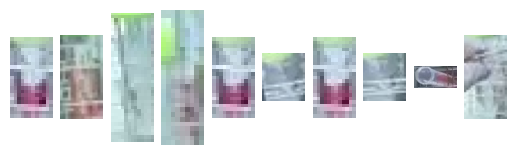

10


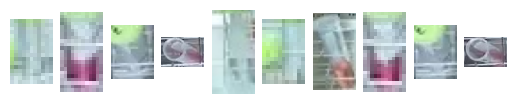

20


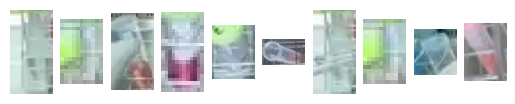

30


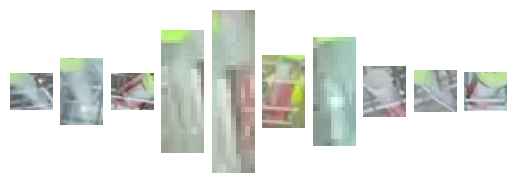

40


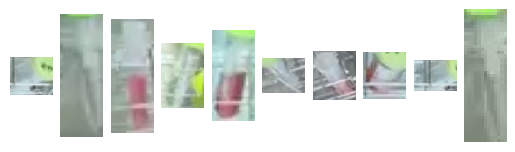

50


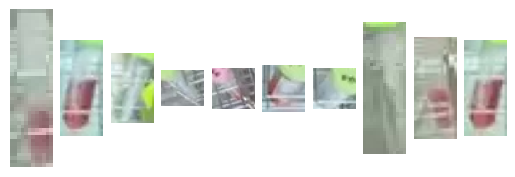

60


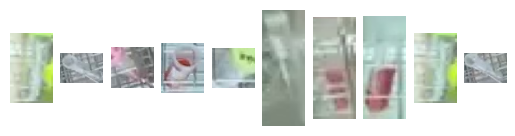

70


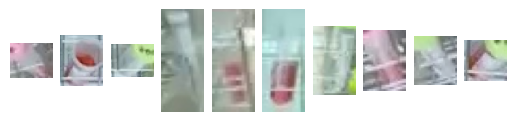

80


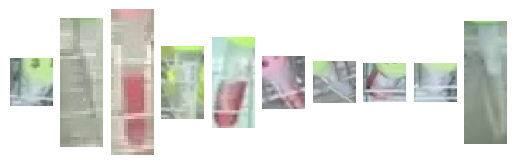

90


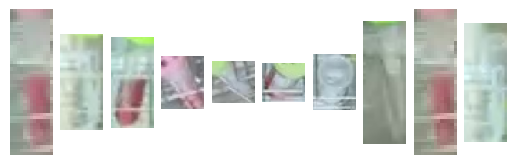

In [6]:
cls_idx = 0  # ラベルを選択
start_idx = 0  # 表示したいラベル画像のはじめのインデックス
len_imgs = 100  # 表示したいラベル画像の枚数
print(classes[cls_idx])
imgs_tmp = plot_images(imgs, cls_idx, start_idx, len_imgs)

3mHNoeMJKvqEqv_0_3paaB2oXCjh8uq_0_6.jpg


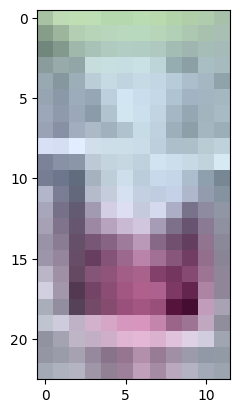

In [7]:
# 間違いを見つけたら、間違った画像を特定する
imgs_tmp = plot_images(imgs, cls_idx, start_idx + 0, 1, is_show=False)

for _, img, path in imgs_tmp:
    print(path)
    plt.imshow(img)
    plt.show()